# Passo 1. Carregar base de dados

In [1]:
"""### Importacao de bibliotecas"""
import numpy as np
import pandas as pd

In [2]:
# Carregar a base e visualizar primeiras linhas
data = pd.read_csv('LifeExpectancy.csv', index_col=0)
# Visualize a base pelo Explorador de Variáveis
data.head()

,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#dimnesões da base
data.shape

(2938, 21)

In [4]:
data.describe()

,Year,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


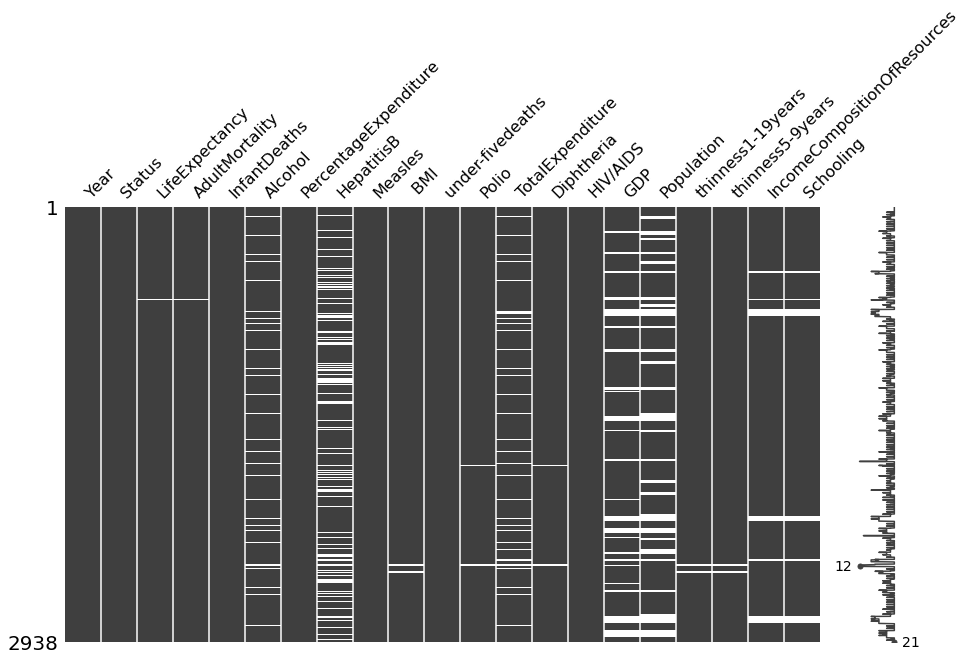

In [9]:
import missingno as msno
msno.matrix(data, figsize=(15,8));

In [10]:
# separa dados a serem inferidos (LifeExpectancy = NaN)
filtro = data['LifeExpectancy'].isnull()
data_infer = data[filtro]
data_infer.shape

(10, 21)

In [11]:
data_infer.head(3)

,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0


In [12]:
# retirar dados com missing no rótulo da base a ser usada pra treinar e testar
data = data[~filtro]
data.shape

(2928, 21)

In [13]:
data.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [14]:
# OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(drop='first') #deleta uma das colunas. evita multicolinearidade
onehotencoder = onehotencoder.fit(data[['Status']])
data.loc[:,'Status'] = onehotencoder.transform(data[['Status']]).toarray()

data.Status.value_counts()

1.0    2416
0.0     512
Name: Status, dtype: int64

In [15]:
data.head()

,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,BMI,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,1.0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,1.0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,1.0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,1.0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,1.0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#Passo 2. Separar base em treino e teste

In [16]:
np.random.seed(0) # semente inicial

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns != 'LifeExpectancy'], 
                                                    data['LifeExpectancy'], 
                                                    test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2342, 20)
(586, 20)
(2342,)
(586,)


In [17]:
# Tratar missing
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

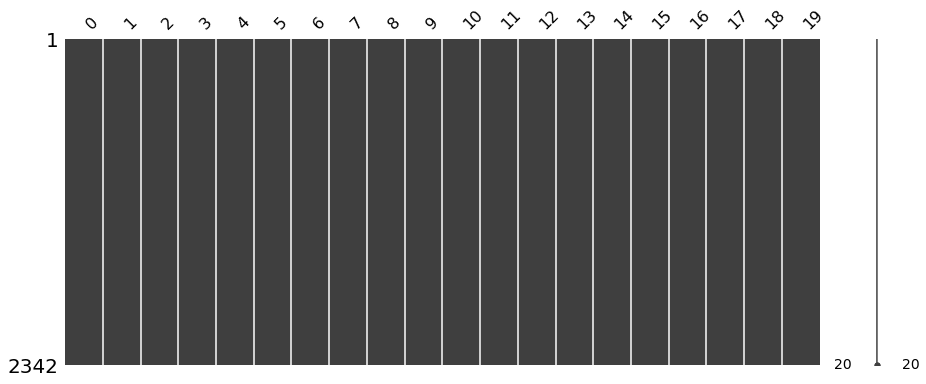

In [18]:
msno.matrix(pd.DataFrame(X_train), figsize=(15,6));

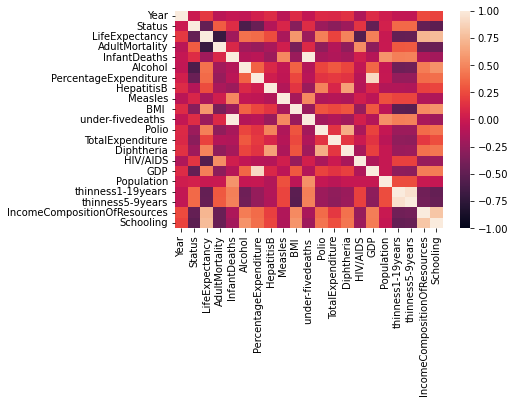

In [21]:
"""## Análise exploratória"""
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1, vmax=1);

# Passo 3. Normalizar Dados

In [22]:
"""## **Normalizando os Dados**"""
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(X_train)
X_train_normalized = preprocessParams.transform(X_train)
X_test_normalized = preprocessParams.transform(X_test)

X_train_normalized[0:2, :]

array([[-0.34282694,  0.45452672, -0.65330399, -0.26370524, -0.82669049,
        -0.14424374,  0.6260516 , -0.20241838,  1.3414912 , -0.26964966,
         0.53601398, -1.36863882,  0.58265452, -0.32092559, -0.03970741,
        -0.12900046,  0.004096  , -0.09315457,  1.0141384 ,  0.5266937 ],
       [ 1.60964705,  0.45452672, -0.3890183 , -0.26370524,  1.40950827,
        -0.36879076,  0.58525661, -0.21651944,  1.29140559, -0.26964966,
         0.53601398,  0.9419948 ,  0.54039185, -0.32092559,  0.65019433,
        -0.15336356, -0.77618176, -0.79161666,  0.81301215,  1.06489027]])

# Passo 4. Treinar Rede Neural

In [23]:
X_train_normalized.shape[1:]

(20,)

In [24]:
"""# Rede Neural"""
from keras import Sequential
from keras.layers import Dense

RN = Sequential()
RN.add(Dense(10, input_shape=X_train_normalized.shape[1:], activation='sigmoid'))
RN.add(Dense(1)) #saida linear.
RN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [25]:
# treinamento
RN.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mape']) 
history = RN.fit(X_train_normalized, y_train, epochs=100, validation_split=0.2)

2022-05-10 14:16:10.903353: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 401.7945 - mape: 15.7565 - val_loss: 17.6944 - val_mape: 4.7382
Epoch 2/100
59/59 [==============================] - 0s 2ms/step - loss: 15.9029 - mape: 4.4751 - val_loss: 13.7156 - val_mape: 4.2322
Epoch 3/100
59/59 [==============================] - 0s 2ms/step - loss: 13.2122 - mape: 4.0981 - val_loss: 12.3698 - val_mape: 3.8923
Epoch 4/100
59/59 [==============================] - 0s 2ms/step - loss: 11.6266 - mape: 3.8283 - val_loss: 11.8201 - val_mape: 3.8541
Epoch 5/100
59/59 [==============================] - 0s 2ms/step - loss: 10.4699 - mape: 3.6448 - val_loss: 10.7676 - val_mape: 3.6176
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 9.8360 - mape: 3.4762 - val_loss: 10.0443 - val_mape: 3.5058
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 9.1496 - mape: 3.3671 - val_loss: 9.8682 - val_mape: 3.4433
Epoch 8/100
59/59 [==============================] - 0s 

Epoch 62/100
59/59 [==============================] - 0s 2ms/step - loss: 5.6684 - mape: 2.5425 - val_loss: 6.4757 - val_mape: 2.6703
Epoch 63/100
59/59 [==============================] - 0s 2ms/step - loss: 5.6650 - mape: 2.5526 - val_loss: 6.4947 - val_mape: 2.6405
Epoch 64/100
59/59 [==============================] - 0s 2ms/step - loss: 5.6420 - mape: 2.5217 - val_loss: 6.3191 - val_mape: 2.6398
Epoch 65/100
59/59 [==============================] - 0s 2ms/step - loss: 5.6292 - mape: 2.5358 - val_loss: 6.4020 - val_mape: 2.6526
Epoch 66/100
59/59 [==============================] - 0s 2ms/step - loss: 5.6262 - mape: 2.5215 - val_loss: 6.4648 - val_mape: 2.6718
Epoch 67/100
59/59 [==============================] - 0s 3ms/step - loss: 5.5697 - mape: 2.5197 - val_loss: 6.2674 - val_mape: 2.5977
Epoch 68/100
59/59 [==============================] - 0s 2ms/step - loss: 5.6616 - mape: 2.5343 - val_loss: 6.4215 - val_mape: 2.6308
Epoch 69/100
59/59 [==============================] - 0s 2ms/s

# Passo 5. Avaliação da Rede Neural

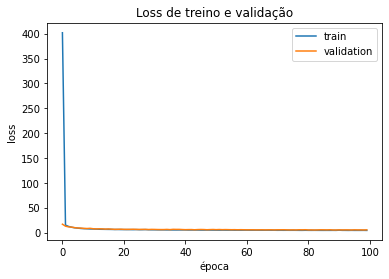

In [26]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss de treino e validação')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

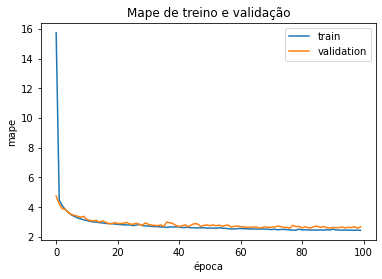

In [27]:
# Gráfico do treinamento: mape do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='validation')
plt.title('Mape de treino e validação')
plt.ylabel('mape')
plt.xlabel('época')
plt.legend();

In [28]:
# avaliação
score = RN.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test score:', score[0])
print('Test mape:', score[1], '%')

Test score: 6.320044040679932
Test mape: 2.584508180618286 %


# Passo 6. Fazer novas previsões

In [29]:
y_test_predicted = RN.predict(X_test_normalized)

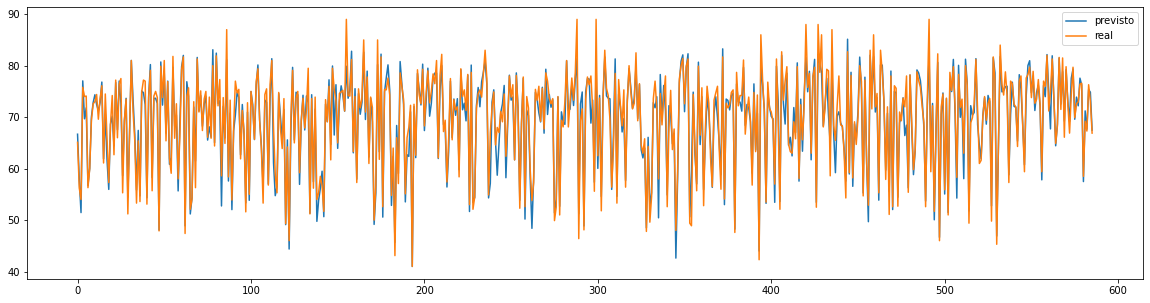

In [30]:
# Avaliação gráfica
results = pd.DataFrame(y_test_predicted, columns = ['previsto'])
results['real'] = np.array(y_test)
results.plot(figsize=(20,5)); #todas as previsões

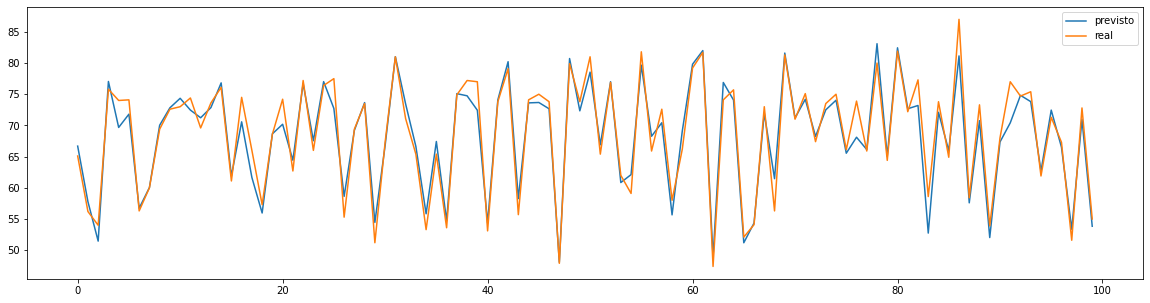

In [31]:
results.iloc[0:100,:].plot(figsize=(20,5)); # somente as 100 primeiras

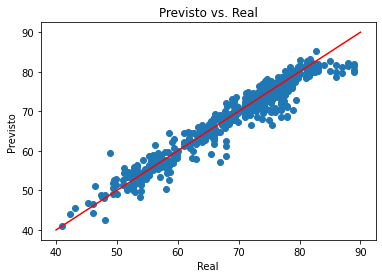

In [32]:
plt.scatter(x=y_test, y=y_test_predicted)
plt.title('Previsto vs. Real')
plt.xlabel('Real')
plt.ylabel('Previsto')

x = [40, 90]
plt.plot(x, x, color='red'); #reta onde y=x

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predicted)

0.9292620118278316

#Inferência para data_infer (sem rótulos)

In [36]:
data_infer

,Year,Status,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,IncomeCompositionOfResources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Cook Islands,2013,1.0,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
Dominica,2013,1.0,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
Marshall Islands,2013,1.0,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
Monaco,2013,1.0,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
Nauru,2013,1.0,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
Niue,2013,1.0,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
Palau,2013,1.0,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
Saint Kitts and Nevis,2013,1.0,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
San Marino,2013,1.0,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1


In [35]:
# retirar coluna LifeExpectancy (não tem nada mesmo...)
data_infer = data_infer.drop(columns=['LifeExpectancy'])

# salvar nomes dos  países
countries = data_infer.index

# 1.onehotencoding
data_infer['Status'] = onehotencoder.transform(data_infer[['Status']]).toarray()

KeyError: "['LifeExpectancy'] not found in axis"

In [37]:
# 2.tratamento de missing
data_infer = imputer.transform(data_infer)

In [38]:
# 3.Normalização
data_infer_normalized = preprocessParams.transform(data_infer)

In [39]:
# 4.Previsão
y_pred = RN.predict(data_infer_normalized)
y_pred

array([[75.751884],
       [75.131714],
       [63.534554],
       [73.99866 ],
       [68.754524],
       [77.5524  ],
       [76.022354],
       [77.79524 ],
       [66.91027 ],
       [67.15048 ]], dtype=float32)

In [44]:
predictions = pd.DataFrame(y_pred, columns = ['Espectativa de Vida'])
predictions.index = countries
predictions

,Espectativa de Vida
Country,
Cook Islands,75.751884
Dominica,75.131714
Marshall Islands,63.534554
Monaco,73.998657
Nauru,68.754524
Niue,77.552399
Palau,76.022354
Saint Kitts and Nevis,77.795242
San Marino,66.910271


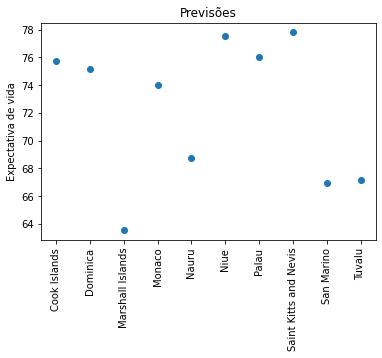

In [40]:
# 5.Gráfico
plt.scatter(countries, y_pred)
plt.xticks(rotation=90)
plt.title('Previsões')
plt.ylabel('Expectativa de vida');
plt.show()

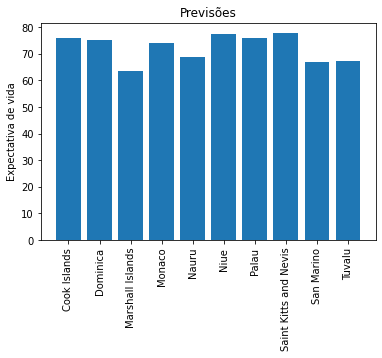

In [41]:
# 5.Gráfico
plt.bar(countries, y_pred.ravel())
plt.xticks(rotation=90)
plt.title('Previsões')
plt.ylabel('Expectativa de vida');
plt.show()